In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.set_printoptions(precision=3)

In [3]:
def sigmoid(a):
    """ Sigmoid function
    
    Parameters:
    -----------
    a : ndarray or float
        Argument
    """
    return 2/(1 + np.exp(-1 * a)) - 1

def d_sigmoid(a):
    """ Derivative of sigmoid function
    
    Parameters:
    -----------
    a : ndarray or float
        Argument
    """
    sig = sigmoid(a)
    return (1 + sig) * (1 - sig) / 2

In [4]:
class dense_layer():
    """ Create dense layer
    
    Parameters:
    -----------
    size_in : int
        Number of input signals
        
    size_out : int
        Number of output signals
    """
    
    def __init__(self, size_in, size_out):
        self._weights = np.random.rand(size_in+1, size_out)*2 - 1
        self._size_in = size_in
        self._size_out = size_out
        
        self._layer_in = np.zeros(size_in + 1)
        self._layer_out = np.zeros(size_out)
    
        self._current_n = 0
        self._dw = np.zeros_like(self._weights)
        
    def forward(self, layer):
        """ Return transformed input layer
    
        Parameters:
        -----------
        layer : ndarray, shape = (size_in, )
            Layer to transform
        """
        self._layer_in = np.concatenate(([1], layer))
        layer_mid = np.dot(self._layer_in, self._weights)
        self._layer_out = sigmoid(layer_mid)
        
        return self._layer_out
    
    def back(self, sigma, err_rate):
        """ Compute delta weights of layer, 
        return transformed error to prev layer
    
        Parameters:
        -----------
        sigma : ndarray, shape = (size_out, )
            Errors from next layer
            
        err_rate : float
            Error rate - learn speed
        """
        sigma_mid = sigma * d_sigmoid(self._layer_out)
        dw = np.expand_dims(self._layer_in, 1) * np.expand_dims(sigma_mid, 0)
        dw *= err_rate
        
        self._dw += dw
        self._current_n += 1
        
        sigma_out = np.dot(self._weights, sigma_mid)
        
        return sigma_out[1:]
    
    def update(self):
        """ Update weights
        """
        if self._current_n < 1:
            return self
        self._weights += self._dw / self._current_n
        self._current_n = 0 
        self._dw.fill(0)
        return self
    
    
class layer_out():
    """ NOT IMPLEMENTED YET 
    (maybe implemented)
    """
    def __init__(self, size_in, size_out=None):
        self.size_in = size_in
        self.size_out = size_out
        
        self.layer_in = None
        self.layer_out = None
        
    def forward(self, layer):
        self.layer_in = layer
        
    def back(self, real_out):
        sigma = real_out - self.layer_in
        return sigma

##### Create layers and function

In [49]:
def check_f(x1, x2):
#     return np.concatenate((x1, x2)), np.sin(2*np.pi*(x1+x2))
    return np.concatenate((x1, x2)), (x1+x2)/2

d2, d12 = 20, 30

layer1 = dense_layer(d2*2, d12)
layer2 = dense_layer(d12, d2)

layer = dense_layer(d2*2, d2)

## One layer

In [52]:
batch_size = 1000
n_loops = 100

for j in range(n_loops): 
    m_sig = np.zeros(shape=(n_loops, d2))
    dws = np.zeros(shape=(n_loops, d2*2+1, d2))
    for i in range(n_loops):
        ys = np.zeros(shape=(d2))
        for b in range(batch_size):
            x1, x2 = np.random.rand(2, d2)
            inp, outp = check_f(x1, x2)
            
            layer_out = layer.forward(inp)
            ys = outp - layer_out
#             ys = layer_out - outp
            
            err1 = layer.back(ys, 0.01)
            m_sig[i] = np.abs(ys)
            
        layer.update()

            
    res = np.zeros(shape=(batch_size, d2))
    for i in range(batch_size):
        
        x1, x2 = np.random.rand(2, d2)
        inp, outp = check_f(x1, x2)
        
        layer_out = layer.forward(inp)
        res[i] = outp - layer_out
#         res[i] = layer_out - outp
        
    print np.abs(res).mean()

0.299582106281
0.296011361756
0.292539516661
0.289189079354
0.285122072928
0.283528433192
0.278600275302
0.277195795653
0.273170419327
0.270089466732
0.268645328003
0.264856093799
0.263003732567
0.260842740579
0.257684042531
0.256876129727
0.252320007279
0.249386342157
0.245680335702
0.242035747924
0.239707974527
0.238100409742
0.235033639391
0.232852355551
0.228613355967
0.227006589934
0.224655938358
0.220435167201
0.217907292525
0.217131466954
0.214393440352
0.208593240673
0.20804948102
0.204419128257
0.203132413067
0.200431868477
0.197753769851
0.196365903818
0.194657642819
0.191149633661
0.189716001881
0.186039746758
0.181527128288
0.181827633794
0.179913022238
0.175272151134
0.174597459953
0.173514705965
0.171414894885
0.169121896627
0.166593021866
0.165298994768
0.162981311544
0.159677534247
0.159533115572
0.155838405346
0.156270051666
0.152387031035
0.151945585563
0.149970653536
0.148096847196
0.143142941966
0.142870224052
0.14031138871
0.140018183713
0.138283485757
0.1369149229

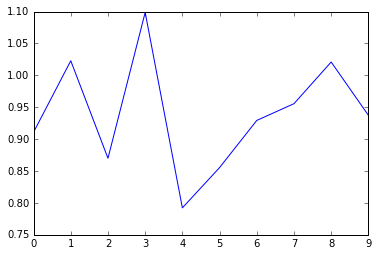

In [23]:
plt.plot(m_sig.mean(axis=1))
# plt.ylim((0, 1))
plt.show()

In [18]:
dws

array([[[  3.05441117e-05,   3.05438931e-05,   3.05438870e-05, ...,
           3.05440992e-05,   3.05441117e-05,   3.05441110e-05],
        [  1.49042779e-05,   1.49041713e-05,   1.49041683e-05, ...,
           1.49042718e-05,   1.49042779e-05,   1.49042776e-05],
        [  1.48882341e-05,   1.48881275e-05,   1.48881245e-05, ...,
           1.48882280e-05,   1.48882341e-05,   1.48882337e-05],
        ..., 
        [  1.50728540e-05,   1.50727462e-05,   1.50727431e-05, ...,
           1.50728479e-05,   1.50728541e-05,   1.50728537e-05],
        [  1.66726346e-05,   1.66725153e-05,   1.66725120e-05, ...,
           1.66726278e-05,   1.66726346e-05,   1.66726343e-05],
        [  1.47161254e-05,   1.47160201e-05,   1.47160172e-05, ...,
           1.47161194e-05,   1.47161254e-05,   1.47161251e-05]],

       [[  3.87209202e-05,   3.87163436e-05,   3.87209122e-05, ...,
           3.87209203e-05,   3.87209195e-05,   3.87209202e-05],
        [  1.88671194e-05,   1.88648894e-05,   1.88671155e-0

In [63]:
batch_size = 1

for j in range(5): 
    m_sig = np.zeros(shape=(9000, d2))
    for i in range(9000):
        ys = np.zeros(shape=(batch_size, d2))
        for b in range(batch_size):
            x1, x2 = np.random.rand(2, d2)
            inp, outp = check_f(x1, x2)

#             layer.forward(inp)
            layer_out_1 = layer1.forward(inp)
            layer_out_2 = layer2.forward(layer_out_1)
            ys[b] = outp - layer_out_2
            

        err1, _ = layer2.back(ys.mean(axis=0), 0.1)
        m_sig[i] = ys.mean(axis=0)
        layer1.back(err1, 0.1)
    
    
    res = np.zeros(shape=(batch_size, d2))
    for i in range(batch_size):
        
        x1, x2 = np.random.rand(2, d2)
        inp, outp = check_f(x1, x2)

#         layer.forward(inp)
        layer_out_1 = layer1.forward(inp)
        layer_out_2 = layer2.forward(layer_out_1)
        res[i] = outp - layer_out_2
        
    print np.abs(res).mean()

0.713563407387
0.645504649315
0.670065817702
0.648209089757
0.741202747485


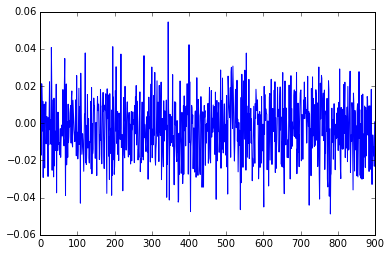

In [11]:
plt.plot(m_sig.mean(axis=1))
plt.show()

In [14]:
m_sig[200:250]

array([[ -6.88089107e-03,  -8.92829770e-02,   3.14437518e-02,
         -3.02446061e-02,  -2.72449933e-02,   2.43181746e-03,
          2.61568620e-02,  -7.65800249e-02,   6.67381597e-02,
         -5.51370354e-02,  -1.28346416e-01,  -3.37692414e-02,
         -3.19755168e-02,   1.46223479e-01,   4.92464312e-02,
         -8.96964144e-03,   7.23838811e-02,  -7.07275831e-02,
          5.58116303e-02,   2.45008463e-02],
       [ -2.68975691e-02,  -3.50017795e-03,  -1.54067871e-01,
         -8.92305528e-02,   5.72627815e-02,   5.53718620e-02,
         -1.46171031e-01,  -1.55101089e-02,   6.14233274e-02,
         -1.35576371e-02,  -4.10749673e-02,  -3.41168310e-02,
         -7.73517927e-02,  -8.14580628e-02,  -1.49394832e-01,
         -6.83646052e-03,   2.34249398e-03,   2.87076680e-02,
         -8.22941488e-03,  -5.75601448e-02],
       [  1.08617703e-01,  -4.58552907e-02,   2.66293444e-02,
         -8.42327222e-02,  -4.16576930e-02,   4.71271658e-02,
          2.00488800e-01,  -9.89373918e-02

In [308]:
outp

array([ 3.86843016,  4.2739339 ,  3.06907173,  3.44201229,  4.53170384])